In [1]:
import pandas as pd
# Altering the pandas setting to display all rows, columns, and width 
pd.set_option('display.max_rows', None)  
pd.set_option('display.max_columns', None)  
pd.set_option('display.width', None)

Silhouette Score: 0.41973149369291834
Davies-Bouldin Index: 0.9133910157630442
              Squad  Cluster         Season
0           Arsenal        1  EPL 2021-2022
1       Aston Villa        0  EPL 2021-2022
2         Brentford        0  EPL 2021-2022
3          Brighton        0  EPL 2021-2022
4           Burnley        0  EPL 2021-2022
5           Chelsea        1  EPL 2021-2022
6    Crystal Palace        0  EPL 2021-2022
7           Everton        0  EPL 2021-2022
8      Leeds United        0  EPL 2021-2022
9    Leicester City        0  EPL 2021-2022
10        Liverpool        1  EPL 2021-2022
11  Manchester City        1  EPL 2021-2022
12   Manchester Utd        0  EPL 2021-2022
13    Newcastle Utd        0  EPL 2021-2022
14     Norwich City        0  EPL 2021-2022
15      Southampton        0  EPL 2021-2022
16        Tottenham        0  EPL 2021-2022
17          Watford        0  EPL 2021-2022
18         West Ham        0  EPL 2021-2022
19           Wolves        0  EPL 2021-20

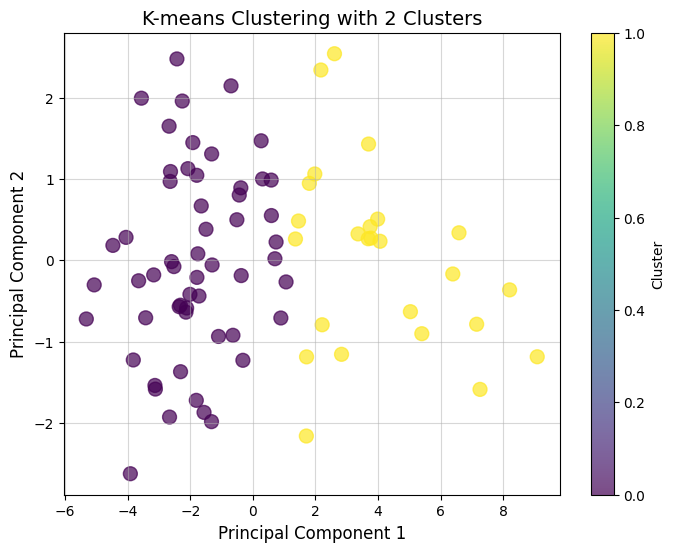

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Loadding data from the team stats for 2021-24
df = pd.read_csv(r"C:\Users\samue\OneDrive\Desktop\Data Science FP\Preprocessing\2021-2024 combined squad data.csv")

# One-hot encode the Season column
season_encoded = pd.get_dummies(df['Season'], prefix='Season')

# Concatenate the one-hot encoded season columns back to the original DataFrame
df = pd.concat([df, season_encoded], axis=1)

# Drop non-numeric and identifier columns by taking only datatypes that is numeric
df_numeric = df.select_dtypes(include=['number'])  

# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

# Perform K-means clustering with 2 clusters
kmeans = KMeans(n_clusters=2, n_init=10, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)  

# Calculate the Silhouette Score
sil_score = silhouette_score(df_scaled, df['Cluster'])
print(f"Silhouette Score: {sil_score}")

# Calculate the Davies-Bouldin Index
db_score = davies_bouldin_score(df_scaled, df['Cluster'])
print(f"Davies-Bouldin Index: {db_score}")

# Display the resulting DataFrame with clusters
teams_with_clusters = df[['Squad', 'Cluster', 'Season']]  
print(teams_with_clusters)

# Create a 2D visualization of the clusters by using the two principle components
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=df['Cluster'], cmap='viridis', label='Cluster', s=100, alpha=0.7)

# Adding labels
plt.title('K-means Clustering with 2 Clusters', fontsize=14)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.colorbar(label='Cluster')
plt.grid(alpha=0.5)

# Show the plot
plt.show()


In [3]:
# Defining the file path
file_path = 'playstyle cluster.csv'  

# Saving the DataFrame as a CSV file 
teams_with_clusters.to_csv(file_path, index=False)

Silhouette Score: 0.3246936958011194
Davies-Bouldin Index: 1.079867580985047
              Squad  Cluster         Season
0           Arsenal        2  EPL 2021-2022
1       Aston Villa        1  EPL 2021-2022
2         Brentford        1  EPL 2021-2022
3          Brighton        2  EPL 2021-2022
4           Burnley        1  EPL 2021-2022
5           Chelsea        2  EPL 2021-2022
6    Crystal Palace        1  EPL 2021-2022
7           Everton        1  EPL 2021-2022
8      Leeds United        2  EPL 2021-2022
9    Leicester City        1  EPL 2021-2022
10        Liverpool        2  EPL 2021-2022
11  Manchester City        2  EPL 2021-2022
12   Manchester Utd        2  EPL 2021-2022
13    Newcastle Utd        1  EPL 2021-2022
14     Norwich City        1  EPL 2021-2022
15      Southampton        1  EPL 2021-2022
16        Tottenham        2  EPL 2021-2022
17          Watford        1  EPL 2021-2022
18         West Ham        1  EPL 2021-2022
19           Wolves        2  EPL 2021-2022

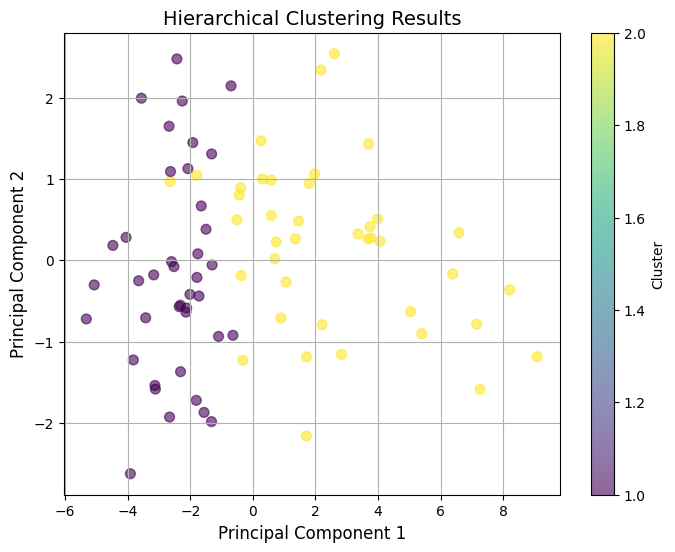

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Loading the data
df = pd.read_csv(r"C:\Users\samue\OneDrive\Desktop\Data Science FP\Preprocessing\2021-2024 combined squad data.csv")

# One-hot encode the Season column
season_encoded = pd.get_dummies(df['Season'], prefix='Season')

# Concatenate the one-hot encoded season columns back to the original DataFrame
df = pd.concat([df, season_encoded], axis=1)

# Drop non-numeric and identifier columns by taking only datatypes that is numeric
df_numeric = df.select_dtypes(include=['number'])  

# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

# Perform hierarchical clustering with 2 clusters
optimal_k = 2  
Z = linkage(df_scaled, method='ward')  
clusters = fcluster(Z, t=optimal_k, criterion='maxclust')  

# Add the cluster labels to the dataframe
df['Cluster'] = clusters

# Calculate the Silhouette Score
sil_score = silhouette_score(df_scaled, df['Cluster'])
print(f"Silhouette Score: {sil_score}")

# Calculate the Davies-Bouldin Index
db_score = davies_bouldin_score(df_scaled, df['Cluster'])
print(f"Davies-Bouldin Index: {db_score}")

# Create a 2D visualization of the clusters by using the two principle components
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

# Display the resulting DataFrame with clusters
teams_with_clusters = df[['Squad', 'Cluster', 'Season']]  
print(teams_with_clusters)  

# Show the plot 
plt.figure(figsize=(8, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=df['Cluster'], cmap='viridis', s=50, alpha=0.6)
plt.title('Hierarchical Clustering Results', fontsize=14)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()



Silhouette Score: 0.4149375050721614
Davies-Bouldin Index: 0.9259223676987436
              Squad  Cluster         Season
0           Arsenal        1  EPL 2021-2022
1       Aston Villa        0  EPL 2021-2022
2         Brentford        0  EPL 2021-2022
3          Brighton        0  EPL 2021-2022
4           Burnley        0  EPL 2021-2022
5           Chelsea        1  EPL 2021-2022
6    Crystal Palace        0  EPL 2021-2022
7           Everton        0  EPL 2021-2022
8      Leeds United        0  EPL 2021-2022
9    Leicester City        0  EPL 2021-2022
10        Liverpool        1  EPL 2021-2022
11  Manchester City        1  EPL 2021-2022
12   Manchester Utd        0  EPL 2021-2022
13    Newcastle Utd        0  EPL 2021-2022
14     Norwich City        0  EPL 2021-2022
15      Southampton        0  EPL 2021-2022
16        Tottenham        0  EPL 2021-2022
17          Watford        0  EPL 2021-2022
18         West Ham        0  EPL 2021-2022
19           Wolves        0  EPL 2021-202

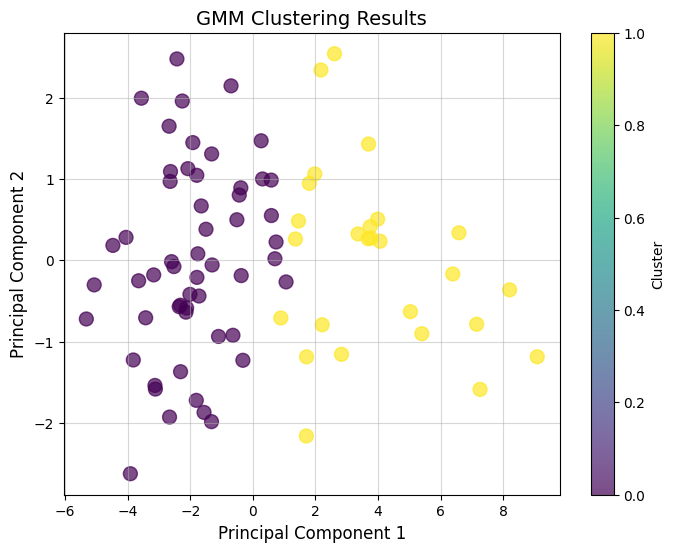

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Loading the data
df = pd.read_csv(r"C:\Users\samue\OneDrive\Desktop\Data Science FP\Preprocessing\2021-2024 combined squad data.csv")

# One-hot encode the 'Season' column
season_encoded = pd.get_dummies(df['Season'], prefix='Season')

# Concatenate the one-hot encoded season columns back to the original DataFrame
df = pd.concat([df, season_encoded], axis=1)

# Drop non-numeric and identifier columns by taking only datatypes that is numeric
df_numeric = df.select_dtypes(include=['number'])  

# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

# Perform GMM clustering with 2 clusters
gmm = GaussianMixture(n_components=2, random_state=42)
df['Cluster'] = gmm.fit_predict(df_scaled)  

# Calculate the Silhouette Score
sil_score = silhouette_score(df_scaled, df['Cluster'])
print(f"Silhouette Score: {sil_score}")

# Calculate the Davies-Bouldin Index
db_score = davies_bouldin_score(df_scaled, df['Cluster'])
print(f"Davies-Bouldin Index: {db_score}")

# Display the resulting DataFrame with clusters
teams_with_clusters = df[['Squad', 'Cluster', 'Season']]  
print(teams_with_clusters)

# Create a 2D visualization of the clusters by using the two principle components
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=df['Cluster'], cmap='viridis', label='Cluster', s=100, alpha=0.7)

# Add labels
plt.title('GMM Clustering Results', fontsize=14)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.colorbar(label='Cluster')
plt.grid(alpha=0.5)

# Show plot
plt.show()
